In [37]:
import pandas as pd 
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [39]:
features_df = pd.read_csv('dataset/power_consumption_g3_feat.csv')

In [3]:
features_df

,Date,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,2017-03-01 16:40:00,21.33,55.91,0.080,387.400,427.300
1,2017-07-27 06:30:00,23.10,48.58,4.908,10.450,8.630
2,2017-10-11 19:00:00,23.10,59.82,0.084,0.446,0.322
3,2017-02-10 06:50:00,12.25,80.80,4.916,0.051,0.111
4,2017-03-06 16:00:00,15.62,59.38,0.075,533.400,579.900
...,...,...,...,...,...,...
52411,2017-05-14 02:20:00,23.58,43.10,0.075,0.110,0.122
52412,2017-11-17 19:20:00,17.30,76.50,0.075,0.040,0.148
52413,2017-03-21 12:10:00,17.90,50.28,0.081,837.000,296.700
52414,2017-07-28 05:10:00,25.23,61.32,4.907,0.091,0.119


In [41]:
features_df['Date'] = pd.to_datetime(features_df['Date'])
features_df.set_index(keys=['Date'], inplace=True)
features_df.sort_index(inplace=True)

In [5]:
features_df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
Date,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085
...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074


In [43]:
target_df = pd.read_csv('dataset/power_consumption_g3.csv')
target_df

,Date,SolarPower
0,2017-06-22 11:50:00,35818.80795
1,2017-04-24 22:50:00,34628.20237
2,2017-11-05 09:00:00,22781.53846
3,2017-10-19 23:20:00,31925.77681
4,2017-03-25 17:10:00,30246.12766
...,...,...
52411,2017-02-08 16:10:00,31808.13559
52412,2017-07-04 17:40:00,35816.61130
52413,2017-07-02 17:00:00,31185.64784
52414,2017-08-02 16:40:00,39463.35183


In [45]:
target_df['Date'] = pd.to_datetime(target_df['Date'])
target_df.set_index(keys=['Date'], inplace=True)
target_df.sort_index(inplace=True)

In [8]:
target_df

,SolarPower
Date,
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127
2017-01-01 00:30:00,28228.86076
2017-01-01 00:40:00,27335.69620
...,...
2017-12-30 23:10:00,31160.45627
2017-12-30 23:20:00,30430.41825
2017-12-30 23:30:00,29590.87452


In [47]:
# merge

df = pd.merge(left = features_df, right = target_df, left_index = True, right_index=True)

In [10]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096,31160.45627
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452


In [11]:
df.isnull().sum()

Temperature            559
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
SolarPower               0
dtype: int64

In [49]:
features = [col for col in df.columns if col not in 'SolarPower']
target = 'SolarPower'

In [13]:
features

['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']

In [51]:
# MISSING VALUES POPOLNUVANJE PRVO NA SAMIOT DATASET BEZ LAGS 
for feature in features:
    df[feature] = df[feature].interpolate(method='linear')

In [15]:
df.isnull().sum()

Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
SolarPower             0
dtype: int64

In [53]:
df = df.groupby(pd.Grouper(freq='2h')).mean()

In [17]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937
2017-01-01 02:00:00,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607
2017-01-01 04:00:00,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987
2017-01-01 06:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872
...,...,...,...,...,...,...
2017-12-30 14:00:00,14.513333,39.675417,0.077667,409.650000,42.163333,29293.789606
2017-12-30 16:00:00,14.015000,43.082500,0.077500,153.905000,152.368333,31262.864386
2017-12-30 18:00:00,10.112500,60.359583,0.075583,1.618917,1.676750,37721.673005


<Axes: >

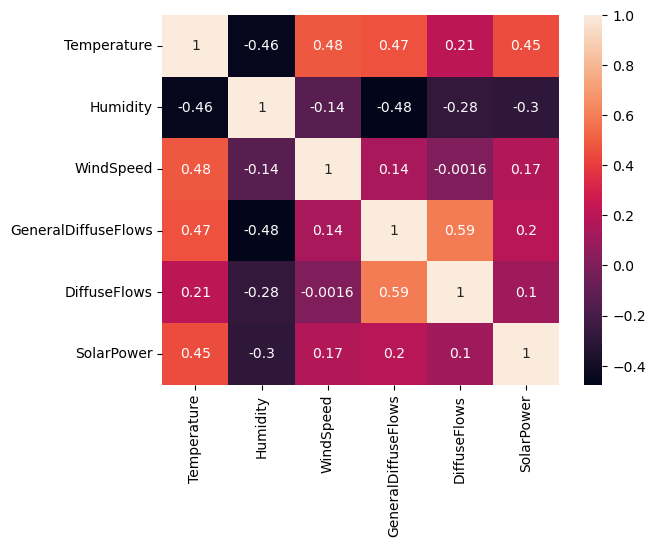

In [18]:
sns.heatmap(df.corr() , annot=True)

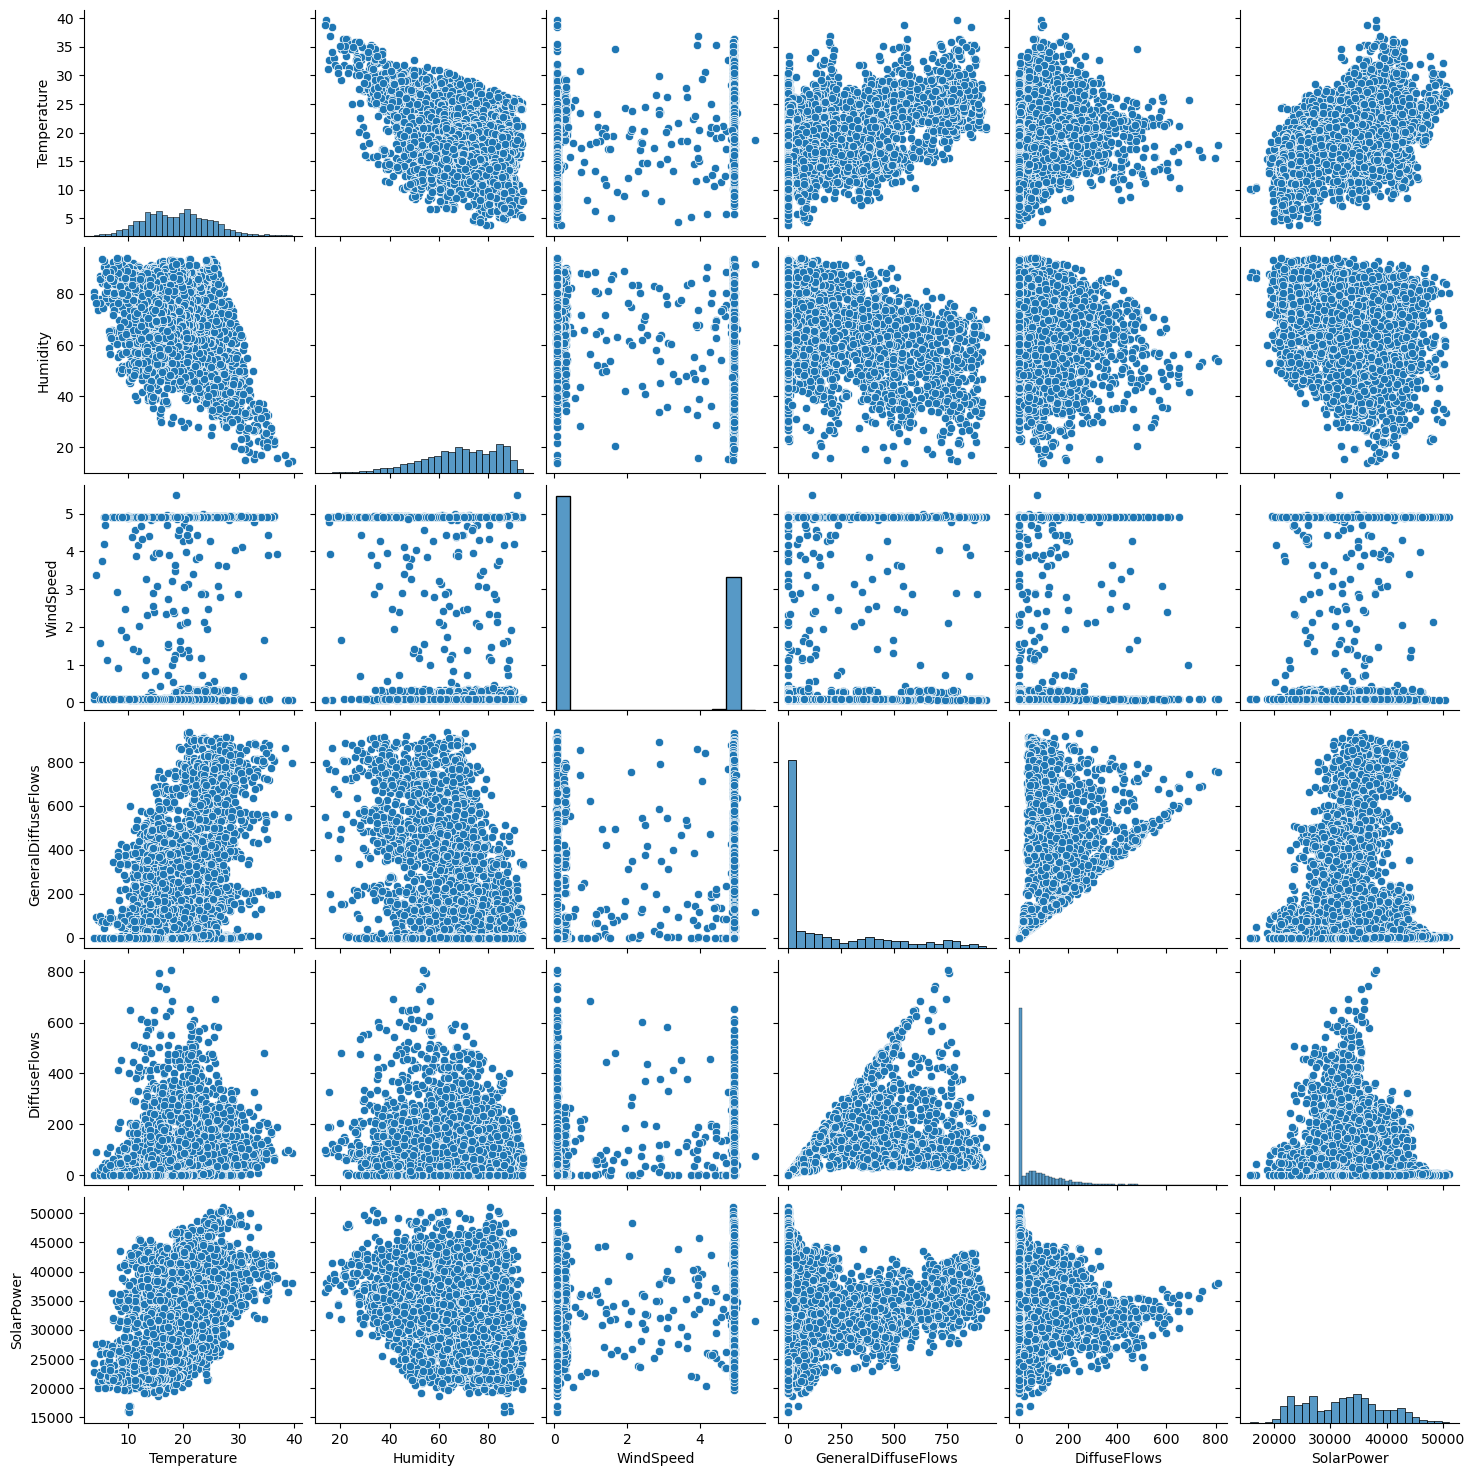

In [19]:
sns.pairplot(df)

In [55]:
for lag in range(4, 0, -1):
    for col in features + [target]:
        df[f'{col}_lag{lag}'] = df[col].shift(lag)

In [57]:
df.drop(columns=features, inplace=True)

In [59]:
df.dropna(axis=0, inplace=True)

In [23]:
df

,SolarPower,Temperature_lag4,Humidity_lag4,WindSpeed_lag4,GeneralDiffuseFlows_lag4,DiffuseFlows_lag4,SolarPower_lag4,Temperature_lag3,Humidity_lag3,WindSpeed_lag3,...,WindSpeed_lag2,GeneralDiffuseFlows_lag2,DiffuseFlows_lag2,SolarPower_lag2,Temperature_lag1,Humidity_lag1,WindSpeed_lag1,GeneralDiffuseFlows_lag1,DiffuseFlows_lag1,SolarPower_lag1
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 08:00:00,21255.189872,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937,5.029333,78.008333,0.082583,...,0.081667,0.061917,0.120833,20641.518987,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
2017-01-01 10:00:00,27986.835442,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607,4.919667,74.641667,0.081667,...,0.082417,0.063583,0.122500,20094.683545,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872
2017-01-01 12:00:00,30060.759495,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987,4.512750,74.575000,0.082417,...,0.082417,79.281917,15.761833,21255.189872,8.019333,63.835833,2.913333,350.887500,34.108333,27986.835442
2017-01-01 14:00:00,29558.481012,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545,4.632167,73.791667,0.082417,...,2.913333,350.887500,34.108333,27986.835442,15.263333,57.075000,0.076167,486.391667,40.981667,30060.759495
2017-01-01 16:00:00,31576.708860,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872,8.019333,63.835833,2.913333,...,0.076167,486.391667,40.981667,30060.759495,15.662500,56.914167,0.075667,377.458333,48.125000,29558.481012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 14:00:00,29293.789606,11.221667,48.974583,0.078417,0.062917,0.112750,21307.984791,11.082500,48.224167,0.078083,...,0.077000,353.441667,36.275833,29649.683142,14.399167,38.129167,0.077667,489.841667,38.455000,30490.240812
2017-12-30 16:00:00,31262.864386,11.082500,48.224167,0.078083,76.933417,16.887500,23720.152091,13.382500,43.325000,0.077000,...,0.077667,489.841667,38.455000,30490.240812,14.513333,39.675417,0.077667,409.650000,42.163333,29293.789606
2017-12-30 18:00:00,37721.673005,13.382500,43.325000,0.077000,353.441667,36.275833,29649.683142,14.399167,38.129167,0.077667,...,0.077667,409.650000,42.163333,29293.789606,14.015000,43.082500,0.077500,153.905000,152.368333,31262.864386


In [61]:
x = df.drop(columns=target)
y = df[target]

In [25]:
x

,Temperature_lag4,Humidity_lag4,WindSpeed_lag4,GeneralDiffuseFlows_lag4,DiffuseFlows_lag4,SolarPower_lag4,Temperature_lag3,Humidity_lag3,WindSpeed_lag3,GeneralDiffuseFlows_lag3,...,WindSpeed_lag2,GeneralDiffuseFlows_lag2,DiffuseFlows_lag2,SolarPower_lag2,Temperature_lag1,Humidity_lag1,WindSpeed_lag1,GeneralDiffuseFlows_lag1,DiffuseFlows_lag1,SolarPower_lag1
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 08:00:00,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937,5.029333,78.008333,0.082583,0.061417,...,0.081667,0.061917,0.120833,20641.518987,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
2017-01-01 10:00:00,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607,4.919667,74.641667,0.081667,0.061917,...,0.082417,0.063583,0.122500,20094.683545,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872
2017-01-01 12:00:00,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987,4.512750,74.575000,0.082417,0.063583,...,0.082417,79.281917,15.761833,21255.189872,8.019333,63.835833,2.913333,350.887500,34.108333,27986.835442
2017-01-01 14:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545,4.632167,73.791667,0.082417,79.281917,...,2.913333,350.887500,34.108333,27986.835442,15.263333,57.075000,0.076167,486.391667,40.981667,30060.759495
2017-01-01 16:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872,8.019333,63.835833,2.913333,350.887500,...,0.076167,486.391667,40.981667,30060.759495,15.662500,56.914167,0.075667,377.458333,48.125000,29558.481012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 14:00:00,11.221667,48.974583,0.078417,0.062917,0.112750,21307.984791,11.082500,48.224167,0.078083,76.933417,...,0.077000,353.441667,36.275833,29649.683142,14.399167,38.129167,0.077667,489.841667,38.455000,30490.240812
2017-12-30 16:00:00,11.082500,48.224167,0.078083,76.933417,16.887500,23720.152091,13.382500,43.325000,0.077000,353.441667,...,0.077667,489.841667,38.455000,30490.240812,14.513333,39.675417,0.077667,409.650000,42.163333,29293.789606
2017-12-30 18:00:00,13.382500,43.325000,0.077000,353.441667,36.275833,29649.683142,14.399167,38.129167,0.077667,489.841667,...,0.077667,409.650000,42.163333,29293.789606,14.015000,43.082500,0.077500,153.905000,152.368333,31262.864386


In [26]:
y.info

<bound method Series.info of Date
2017-01-01 08:00:00    21255.189872
2017-01-01 10:00:00    27986.835442
2017-01-01 12:00:00    30060.759495
2017-01-01 14:00:00    29558.481012
2017-01-01 16:00:00    31576.708860
                           ...     
2017-12-30 14:00:00    29293.789606
2017-12-30 16:00:00    31262.864386
2017-12-30 18:00:00    37721.673005
2017-12-30 20:00:00    36183.523447
2017-12-30 22:00:00    32050.697084
Freq: 2h, Name: SolarPower, Length: 4364, dtype: float64>

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [97]:
x_train.shape

(3491, 24)

In [69]:
lags=4

In [99]:
#(samples, lags, features)  - da trebase so nevronski mrezi

#(x_train.shape[0], lags, (x_train.shape[1] // lags))

In [101]:
# x_train = x_train.reshape((x_train.shape[0], lags, (x_train.shape[1] // lags)))
# x_test = x_test.reshape((x_test.shape[0], lags, (x_test.shape[1] // lags )))

In [103]:
x_train.shape

(3491, 24)

In [141]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators = 20)

In [143]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [145]:
y_pred = model.predict(x_test)

In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9032364394775817
1386.2787054524626
3460756.472461416


## Perofrm hyper-parameter optimization with a 5-fold cross validation.


In [154]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

grid_search = GridSearchCV(
    estimator = XGBRegressor(),
    param_grid={'n_estimators' : [15,20,25,30,35,40],
                'max_depth' : [2,3,4,5,6,8]
               },
    cv = TimeSeriesSplit(n_splits=5)
)

In [156]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 8],
                         'n_estimators': [15, 20, 25, 30, 35, 40]})

In [158]:
grid_search.best_params_

{'max_depth': 6, 'n_estimators': 40}

In [160]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=40, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Fit the model with the best parameters on the training dataset

In [165]:
regressor = XGBRegressor(n_estimators=40, max_depth=6).fit(x_train, y_train)

In [167]:
y_pred = regressor.predict(x_test)

In [169]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9049127192264712
1367.372112693299
3400804.193325497
